In [1]:
#import csv from the dataset
import pandas as pd
df=pd.read_csv('../final.csv')
df.head()

,CASEID,YEAR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
0,20100000001,2010,9,1,20,1,2,3,4,3,...,0,0,0,0,0,1,4,1,1,8
1,20100000002,2010,9,1,20,1,-9,1,1,-9,...,0,0,0,0,1,3,9,2,4,1
2,20100000003,2010,8,1,-9,1,4,3,1,-9,...,0,0,0,0,0,1,9,2,1,1
3,20100000004,2010,5,1,20,1,1,4,2,-9,...,0,0,0,0,0,3,19,1,1,8
4,20100000005,2010,9,1,20,1,2,2,4,3,...,0,0,0,0,0,2,15,2,1,3


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)


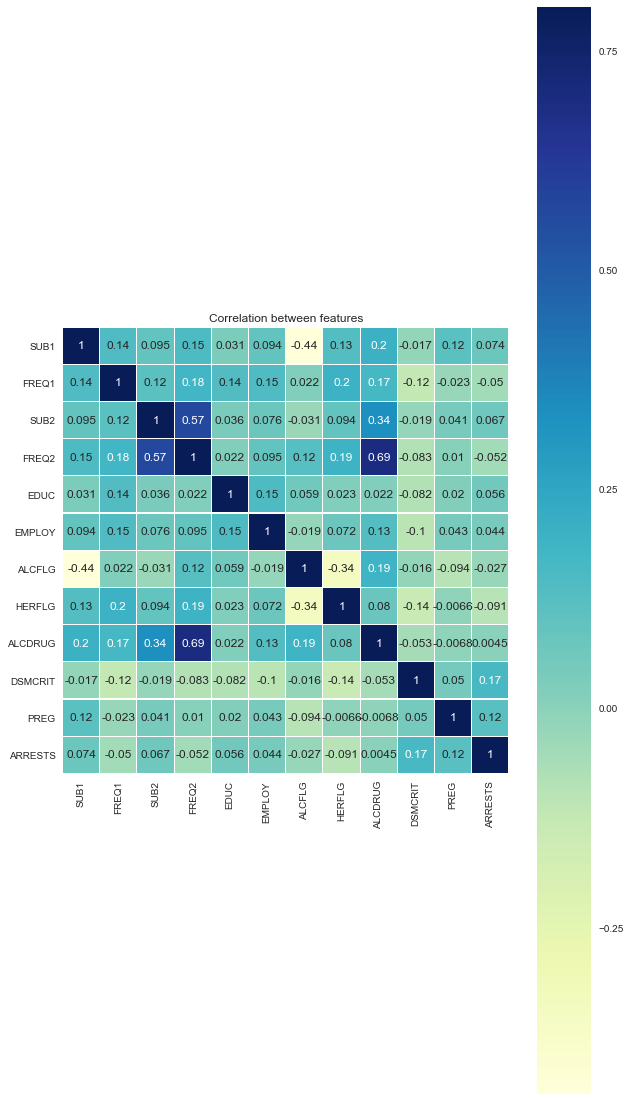

In [12]:
corr=df.loc[:,["SUB1","FREQ1","SUB2","FREQ2","EDUC","EMPLOY","ALCFLG","HERFLG","ALCDRUG","DSMCRIT","PREG","ARRESTS"]].corr()#["Survived"]
plt.figure(figsize=(10, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
plt.show()

In [36]:
df2 = df[(df[['DAYWAIT']] > 0).all(1)]
df2 = df2.sort_values(by='DAYWAIT')

df3 = df2.query("STFIPS == 39")['DAYWAIT'] #39 = Ohio
print df3.tail(100)

KeyError: "['DAYWAIT'] not in index"

In [32]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ssemhc/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [ ]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = ["NOT OF HISPANIC ORIGIN","PUERTO RICAN","MEXICAN","OTHER SPECIFIC HISPANIC","HISPANIC SPECIFIC ORIGIN NOT SPECIFIED","CUBAN"]
slices=df['ETHNIC'].value_counts()
slices=slices.drop([-9])
colors = ['cyan', '#0fff00', 'yellowgreen', 'lightcoral', 'lightskyblue','yellow']
patches, texts = plt.pie(slices, colors=colors, startangle=90)
plt.legend(patches, labels,loc = 'best')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.title("ETHNICITY OF MENTAL PATIENTS OVER YEARS")
plt.show()
slices

In [ ]:
df.groupby('AGE')['YEAR'].value_counts()

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')


In [ ]:
plt.figure()
df.groupby('AGE')['YEAR'].value_counts().unstack().plot()
plt.title('Number Of Patients by Age group')

ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
plt.show()
# set the labels to display at those ticks

In [ ]:
import matplotlib.pyplot as plt

ax = plt.gca() # grab the current axis
ax.set_xticks([1,2,3]) # choose which x locations to have ticks
ax.set_xticklabels([1,"key point",2]) # set the labels to display at those ticks

NameError: name 'df' is not defined